

# Project: Investigate a Dataset (TMDb dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
In this project of my Data Analysis, I am investigating a TMDb movies database file that contains data on movies, including their details of budget, revenue, release dates, etc.

Let's take a glimpse at TMDb movie database csv file.

In [7]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import csv # read and write csv files
from datetime import datetime # operations to parse dates
import matplotlib.pyplot as plt
% matplotlib inline

In [11]:
#reading tmdb csv file and storing that to a variable
path_to_file="E:/tmdb-movies.csv"
data_tmdb = pd.read_csv(path_to_file, encoding='utf-8')

#print out the first 5 rows of data in my dataset
data_tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


# Questions i want to explore after seeing the data

### 1. highest and lowest budget movies

### 2. highest and lowest runtime of movies

### 3. profits made by movies over the years

### 4. runtime distribution of the movies

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [17]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
import numpy as np
import pandas as pd
import csv # read and write csv files
from datetime import datetime # operations to parse dates
import matplotlib.pyplot as plt
% matplotlib inline



## Showing data types of columns

In [18]:
#reading tmdb csv file and storing that to a variable
path_to_file="E:/tmdb-movies.csv"
data_tmdb = pd.read_csv(path_to_file, encoding='utf-8')

#showing data types of all columns
data_tmdb.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

## We dont need float data type so we convert it into int

In [19]:
#applymap function changes the columns data type to the type 'argument' we pass
data = ['popularity', 'revenue_adj','budget_adj','vote_average']

data_tmdb[data] = data_tmdb[data].applymap(np.int64)
#shwoing the datatypes of all columns
data_tmdb.dtypes

id                       int64
imdb_id                 object
popularity               int64
budget                   int64
revenue                  int64
original_title          object
cast                    object
homepage                object
director                object
tagline                 object
keywords                object
overview                object
runtime                  int64
genres                  object
production_companies    object
release_date            object
vote_count               int64
vote_average             int64
release_year             int64
budget_adj               int64
revenue_adj              int64
dtype: object

### Now we need to convert the 'release_date' column to date format

In [21]:
#calling the column which need to be formatted in datetime and storing those values in them
data_tmdb.release_date = pd.to_datetime(data_tmdb['release_date'])

#showing the dataset
data_tmdb.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6,2015,137999939,1392445892
1,76341,tt1392190,28,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7,2015,137999939,348161292


'release_date' column has been changed to date format. (year-month-day)

# Data Cleaning (Dropping rows and colums that we dont need )

### Lets see how many entries are there in data 

In [23]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
data_tmdb.shape



(10866, 21)

## It means we have 10866 rows and 21 columns

## Now dropping the data we dont need

In [24]:
#lets give a list of data that needs to be deleted
del_col = [ 'id', 'imdb_id', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']

 
#deleting the columns from the database
data_tmdb = data_tmdb.drop(del_col,axis = 1)
#now take a look at this new dataset
data_tmdb.head(3)

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,32,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,28,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,13,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015


### Now lets delete duplicate values

In [25]:
#will drop duplicate rows but will keep the first one
data_tmdb.drop_duplicates(keep = 'first', inplace = True)

#now lets see how many entries are there
data_tmdb.shape


(10865, 11)

#### we had one duplicate copy of a movie. Now we have 10865 movie entries.

## Now first lets check if we have any movie with a runtime value of 0. If we have any, we will replace with NaN.

In [26]:
#replacing 0 with NaN of runtime column of the data.
data_tmdb['runtime'] = data_tmdb['runtime'].replace(0, np.NaN)

<a id='eda'></a>
# Exploratory Data Analysis

### Research Question 1 (Which movie has highest and lowest budget)

In [43]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
def sort(column_name):
    
    #taking the index value of the highest number in budget column
    high = data_tmdb[column_name].idxmax()
    #calling by index number,storing that row info to a variable
    high_index= pd.DataFrame(data_tmdb.loc[high])
    
    #same as above
    low = data_tmdb[column_name].idxmin()
    low_index = pd.DataFrame(data_tmdb.loc[low])
    
    #concatenating two dataframes
    data = pd.concat([high_index, low_index], axis = 1)
    
    return data

#calling the function and passing the argument
sort('budget')


,2244,30
popularity,0,3
budget,425000000,0
revenue,11087569,29355203
original_title,The Warrior's Way,Mr. Holmes
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Ian McKellen|Milo Parker|Laura Linney|Hattie M...
director,Sngmoo Lee,Bill Condon
tagline,Assassin. Hero. Legend.,The man behind the myth
runtime,100,103
genres,Adventure|Fantasy|Action|Western|Thriller,Mystery|Drama
release_date,2010-12-02 00:00:00,2015-06-19 00:00:00


# Research Question 2  (Which movie has highest and lowest runtime)

In [44]:
sort('runtime')

,3894,4883
popularity,0,0
budget,0,0
revenue,0,0
original_title,The Story of Film: An Odyssey,Fresh Guacamole
cast,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,NaN
director,Mark Cousins,PES
tagline,NaN,NaN
runtime,900,2
genres,Documentary,Animation
release_date,2011-09-03 00:00:00,2012-03-02 00:00:00


# Research Question 3(Average runtime of all movies)


In [47]:
#giving a function which calculates average of a particular column
def average(column_name):
    
    return data_tmdb[column_name].mean()

In [48]:
#calling function to show the mean
average('runtime')

102.3638545320288

### Average runtime is approx 102 minutes

# Now lets plot a graph on runtime distribution of all movies

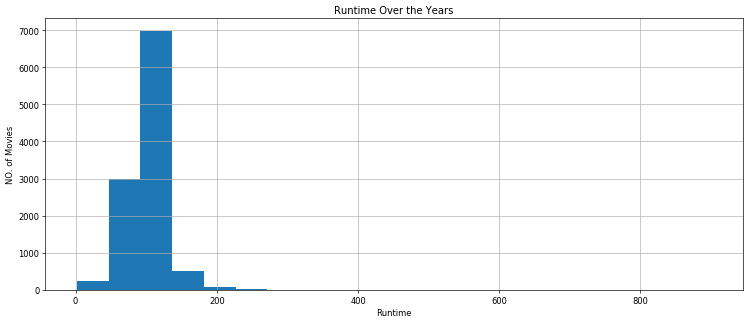

In [122]:
#plotting a histogram of runtime of movies
#x-axis label name
#plt.xlabel('Runtime of Movies', fontsize = 15)
#y-axis label name
#plt.ylabel('Number of Movies', fontsize=15)
#title of the graph

#plt.title('Runtime distribution of all the movies', fontsize=18)

#giving a histogram plot
#plt.hist(data_tmdb['runtime'], rwidth = 0.9, bins =31)
#displays the plot
#plt.show()
plt.figure(figsize=(15,6),dpi=60)
data_tmdb['runtime'].hist(rwidth =1,bins=20)
plt.xlabel('Runtime')
plt.title('Runtime Over the Years');
plt.ylabel('NO. of Movies')
plt.show()




The above graph shows us that how many movies lie between the time interval shown above. For example, as you can see the tallest bar here is time interval between 90-120 min(approx).The distribution of this graph is positively skewed or right skewed!

# Research Question 4(Trends in movie profit by years)

### First we have to calculate profit

In [137]:
#To calculate profit of each movie, we need to substract the budget from the revenue of each movie
data_tmdb.insert(2, 'profit', data_tmdb['revenue'] - data_tmdb['budget'])

#we change the data type to int
data_tmdb['profit'] = data_tmdb['profit'].apply(np.int64)

#showing the dataset
data_tmdb.head(2)

,popularity,budget,profit,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,32,150000000,1363528810,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,28,150000000,228436354,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015


## Plotting the graph

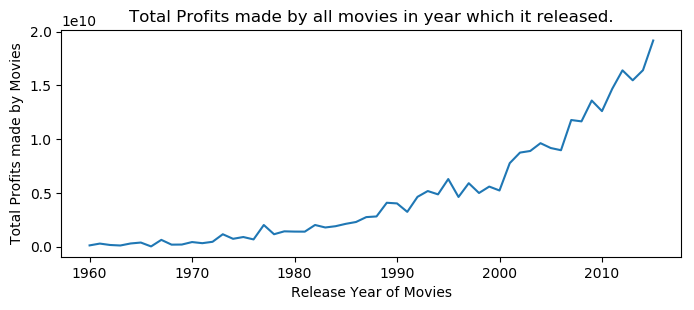

In [142]:
#Line plot used for this
#Since we want to know the profits of movies for every year we need to group all the movies for those years

#the groupby function below collects all the movies for that year and then the profits of all those movies for that years is been added
#and storing all this in variable
profit_by_year = data_tmdb.groupby('release_year')['profit'].sum()

#giving the figure size(width, height)
plt.figure(figsize=(8,3), dpi = 100)

#labeling x-axis
plt.xlabel('Release Year of Movies', fontsize = 10)
#labeling y-axis
plt.ylabel('Total Profits made by Movies', fontsize = 10)
#title of a the plot
plt.title('Total Profits made by all movies in year which it released.')

#plotting what needs to be plotted
plt.plot(profit_by_year)

#showing the plot
plt.show()

### We can see that the Not every year had same amount of movies released, the year 2014(approx) had the most movie releases than in any other year. The more old the movies, the less releases at that year (atleast this is what the dataset shows us). And it also shows us that the highest profit is in the year 2014 and is more than any other year 

<a id='conclusions'></a>
# Conclusions


## As i have answered the questions that i thought were interesting i found out that

## 1. the no of people going to watch movies have increased significantly as the profit made over the years have been increasing very fast.
## 2. the runtime over the years has been decreased significantly as the avg runtime of movies is just 102 (approx) minutes
## 3. most no of movies have runtime between 90-120(approx) minutes.

## Thats my conclusion.